# Flight Price Prediction

## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

`Size of training set:` 10683 records

`Size of test set:` 2671 records

 
## GOAL : 
To build a machine learning model to predict the price of the flight ticket. 

There are two datasets provided one for training and other for testing. So lets import both - the train dataset for building our model and the test dataset for predicting from the trained model.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing the dataset

Since the data is in the form of excel file we have to use pd.read_excel to load the data.

In [2]:
# Reading the excel file
train_df = pd.read_excel("Data_Train.xlsx")
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## FEATURES:

`Airline:` The name of the airline.

`Date_of_Journey:` The date of the journey

`Source:` The source from which the service begins.

`Destination:` The destination where the service ends.

`Route:` The route taken by the flight to reach the destination.

`Dep_Time:` The time when the journey starts from the source.

`Arrival_Time:` Time of arrival at the destination.

`Duration:` Total duration of the flight.

`Total_Stops:` Total stops between the source and destination.

`Additional_Info:` Additional information about the flight

`Price:` The price of the ticket


##### The train dataset contains the details of the prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. The dataset contains both numerical and categorical data. Here "Price" is our target variable which is continuous. Hence we can use regression algorithms to predict the prices of the flight tickets.



In [3]:
#Viewing the top 5 rows in the datset
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Exploratory Data Analysis (EDA)

In [4]:
# Checking the dimension of dataset 
train_df.shape

(10683, 11)

The train dataset has 10683 rows and 11 columns.

In [5]:
# To get overview of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


This gives the information about the dataset which includes indexing , column names , non-null values and dtypes.

- There are no null values in almost all the columns except for 'Route' and 'Total_Stops', which have 1 null value each.
- There are a total of 11 columns all with object type data except the target column 'price' which has integer type data.

In [6]:
# Checking the type of dataset
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The columns in the train dataset contains two different types of data that is object and integer data types.

# Feature Engineering
The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is unable to understand this type of data.
Therefore, we have to convert this datatype into timestamp to use them properly for prediction.

In [7]:
# Converting Date and Time columns from object type to Datetime Type
train_df['Date_of_Journey']=pd.to_datetime(train_df['Date_of_Journey'])
train_df['Dep_Time']=pd.to_datetime(train_df['Dep_Time'])
train_df['Arrival_Time']=pd.to_datetime(train_df['Arrival_Time'])

In [8]:
#Checking the type of dataset again
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now the date and time columns in the dataset have been converted to datetime  columns from object type data.

First let us split the 'Date_of_Journey' column's data into Month and day. Since the dataset contains only 2019 year data so we need not take year column.

In [9]:
# Extracting Day from Date_of_Journey column
train_df["Journey_Day"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
train_df["Journey_Month"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.month

The 'Date_of_Journey' column has been converted into integers type data, we can drop this column now.

In [10]:
# Dropping Date_of_Journey column
train_df.drop("Date_of_Journey",axis=1,inplace=True)

The column Duration has values in terms of minutes and hours. Duration means the time taken by the flight to reach the destination and it is the difference between Departure time and the arrival time. Now let's extract hours and minutes from Duration.

## Splitting the Departure time, Arrial Time and Duration - separating hours and minutes and storing them in new columns in our dataframe.

In [11]:
#Checking the unique values present in the Duration column
train_df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

### Converting the values in Duration column to minutes

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [12]:
#creating a list with values from colum 'Duration'
duration = train_df['Duration'].tolist()

In [13]:
#Checking the output of the duration
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [14]:
#replacing 'h' with *60, whitespace with "+",removing "m" and removing leading zeroes from the decimal integer literals since they aren't allowed in python

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 

In [15]:
#Checking the output of the duration
duration

['2*60+50',
 '7*60+25',
 '19*60',
 '5*60+25',
 '4*60+45',
 '2*60+25',
 '15*60+30',
 '21*60+5',
 '25*60+30',
 '7*60+50',
 '13*60+15',
 '2*60+35',
 '2*60+15',
 '12*60+10',
 '2*60+35',
 '26*60+35',
 '4*60+30',
 '22*60+35',
 '23*60',
 '20*60+35',
 '5*60+10',
 '15*60+20',
 '2*60+50',
 '2*60+55',
 '13*60+20',
 '15*60+10',
 '5*60+45',
 '5*60+55',
 '2*60+50',
 '2*60+15',
 '2*60+15',
 '13*60+25',
 '2*60+50',
 '22*60',
 '5*60+30',
 '10*60+25',
 '5*60+15',
 '2*60+30',
 '6*60+15',
 '11*60+55',
 '11*60+5',
 '8*60+30',
 '22*60+5',
 '2*60+45',
 '12*60',
 '2*60+50',
 '2*60+50',
 '2*60+15',
 '16*60+5',
 '19*60+55',
 '3*60+15',
 '25*60+20',
 '2*60+50',
 '3*60',
 '2*60+50',
 '16*60+15',
 '15*60+5',
 '2*60+15',
 '6*60+30',
 '25*60+5',
 '12*60+25',
 '27*60+20',
 '10*60+15',
 '10*60+30',
 '2*60+15',
 '10*60+25',
 '2*60+50',
 '1*60+30',
 '13*60+20',
 '2*60+15',
 '1*60+25',
 '26*60+30',
 '7*60+20',
 '13*60+30',
 '5*60',
 '2*60+45',
 '2*60+50',
 '1*60+30',
 '19*60+5',
 '2*60+15',
 '14*60+50',
 '2*60+40',
 '22*

In [16]:
# Performing the eval function on the data
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])

In [17]:
#Checking the length of the duration 
len(duration)

10683

This confirms the count of the number of rows in the column is as expected

In [18]:
#Assigning a variable for the dataframe
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [19]:
# Matching the index of both dataframes
dur_df.index = train_df.index

In [20]:
#Concatenating two dataframes
train_df['Duration(mins)'] = dur_df['Duration(mins)']

In [21]:
# Dropping Duration column as it is redundant
train_df.drop("Duration",axis=1,inplace=True)

Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [22]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
train_df["Dep_Hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
train_df["Dep_Min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute

Now we have extracted hour and minute from Dep_Time column so we can drop this column as it is redundant

In [23]:
# Dropping Dep_Time column
train_df.drop("Dep_Time",axis=1,inplace=True)

Similarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column.

In [24]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time
train_df["Arrival_Hour"] = pd.to_datetime(train_df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
train_df["Arrival_Min"] = pd.to_datetime(train_df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
train_df.drop("Arrival_Time",axis=1,inplace=True)

Now we have extracted values from the respective columns, let's check the data frame after feature engineering.

In [25]:
# Checking dataset again
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,285,16,50,21,35


In [26]:
#Checking the shape of the dataframe
train_df.shape

(10683, 14)

Now the dataset contains 10683 rows and 14 columns.

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries in the dataset

In [27]:
# Checking the value counts of each columns
for i in train_df.columns:
        print(train_df[i].value_counts())
        print('-'*50)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
--------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
--------------------------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
--------------------------------------------------
DEL → BOM → COK          2376
BLR → DEL                1552
CCU

These are the list of values present in the columns.

From the above value counts we can observe some repeated categories in some columns. Let's replace them.

In [28]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
train_df["Airline"] = train_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
train_df["Airline"] = train_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
train_df["Airline"] = train_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
train_df["Destination"] = train_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
train_df["Additional_Info"] = train_df["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
train_df["Additional_Info"] = train_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

Now let's check the value counts in the above columns

In [29]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(train_df[i].value_counts())
    print("-"*50)


Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
--------------------------------------------------
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
--------------------------------------------------
No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64
--------------------------------------------------


In [30]:
# Checking number of unique values in each column
train_df.nunique()

Airline               9
Source                5
Destination           5
Route               128
Total_Stops           5
Additional_Info       8
Price              1870
Journey_Day           9
Journey_Month         7
Duration(mins)      368
Dep_Hour             24
Dep_Min              12
Arrival_Hour         24
Arrival_Min          12
dtype: int64

These are the number of unique values present in each columns.

In [31]:
# Checking null values in the dataframe
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration(mins)     0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

We can see there are missing values in Route and Total_Stops column. These two columns have categorical data so we shall fill the null values using mode method.

# Treating null values using imputation techniques

In [32]:
# let's check the mode of the categorical columns to fill the null values 
print("The mode of Route is:",train_df["Route"].mode())  # we will fill the null values using its mode
print("The mode of Total_Stops is:",train_df["Total_Stops"].mode())

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


DEL → BOM → COK and 1 stop are the modes of Route and Total_Stops respectively.

In [33]:
# Filling missing values in Route by its mode DEL → BOM → COK
train_df["Route"] = train_df["Route"].fillna(train_df["Route"].mode()[0])

# Filling missing values in Total_Stops by its mode 1 stop
train_df["Total_Stops"] = train_df["Total_Stops"].fillna(train_df["Total_Stops"].mode()[0])

In [34]:
# Checking missing values again
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration(mins)     0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

We can observe there are no null values in any of the columns.

<AxesSubplot:>

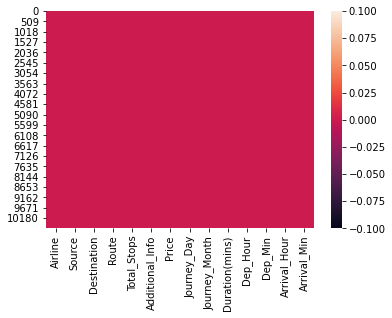

In [35]:
# Let's visualize the null values clearly
sns.heatmap(train_df.isnull())

It is clear that there are no missing values found.

In [36]:
# Checking how many columns are there in the dataset
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration(mins)', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

These are the columns present in the dataset.

In [37]:
# Checking the uniqueness of target column
train_df["Price"].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

These are the unique values present in the target column.

In [38]:
# Checking the list of counts in target columns
train_df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

These are the value counts in the target column.

In [39]:
# Checking whether the dataset contains any space
train_df.loc[train_df['Price']==" "]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min


There is no any empty space in any of the columns.

# Description of Dataset

In [40]:
# Statistical summary of dataset
train_df.describe()

,Price,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,643.093232,12.490686,24.411214,13.348778,24.690630
std,4611.359167,8.803701,2.987489,507.862001,5.748650,18.767980,6.859125,16.506036
min,1759.000000,3.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,170.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,520.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,930.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,2860.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data only, categorical type are not included

## Observations
From the above description we can observe the following things

- The count of every column is same which means there are no missing values preent in the dataset.
- The mean value is greater than the median(50%) in the columns Price, Journey_Day, Duration(mins) and Dep_Hour so we can say they are skewed to right.
- The median(50%) is bit greater than mean in Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left.
- From the description we can say the minimum price of the flight ticket is Rs.1759 and maximum price is Rs.79512 also the mean is 9087.
- We can observe that there is huge difference in maximum and 75% percentile in the columns Price, Duration(mins), Arrival_Min, that means huge outliers present in those columns. These differences can also be seen in many other columns.


Before going to visualize the data, we will separate numerical and categorical column for better understanding.

In [41]:
# checking for categorical columns
categorical_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


These are the categorical columns in the given dataset.

In [42]:
# Now checking for numerical columns
numerical_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Price', 'Journey_Day', 'Journey_Month', 'Duration(mins)', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


These are the numerical columns present in the dataset.

# Data Visualization

## Univariate Analysis

# Plotting categorical columns

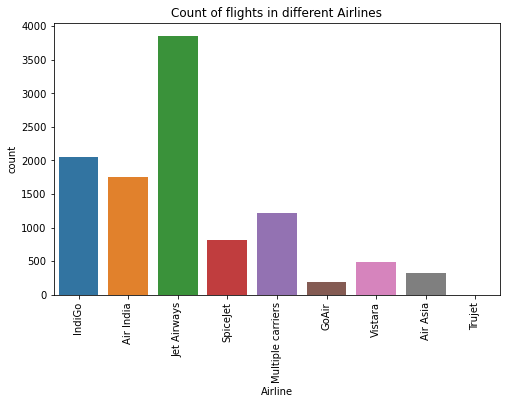

In [43]:
# Visualizing the various Airlines present in the dataset
plt.figure(figsize=(8,5))
sns.countplot(train_df["Airline"])
plt.title("Count of flights in different Airlines")
plt.xticks(rotation=90)
plt.show()

# Observations

- The count of flights is high in Jet Airways and the count is very less in Trujet and GoAir category.
- Indigo, Air India, Multiple carriers, Spice jet, Vistara, Air Asia have number of flights in decreasing order

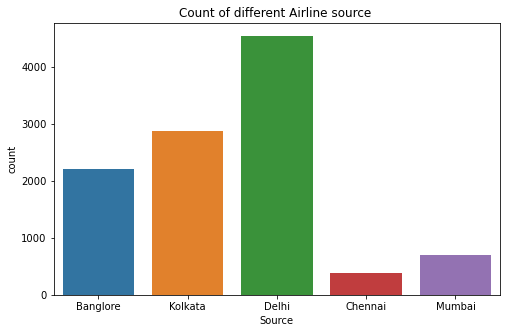

In [44]:
# Visualizing the source from which place the service begins 
plt.figure(figsize=(8,5))
sns.countplot(train_df["Source"])
plt.title("Count of different Airline source ")
plt.show()

# Observations

- The count of source is high in Delhi which means most of the flighs service begins in Delhi.
- Kolkata and Bangalore stands next to Delhi
- Mumbai and Chenni have least source, which says kess number of flights start from these cities

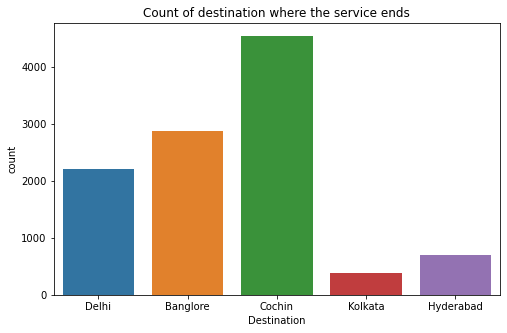

In [45]:
# Visualizing the destination where the service ends 
plt.figure(figsize=(8,5))
sns.countplot(train_df["Destination"])
plt.title("Count of destination where the service ends")
plt.show()

# Observations
 - The Cochin destination has highest counts. Most of the flights services ends in Cochin destination.
 - This is followed by Bangalore and delhi
 - Hyderabad and Kolkata have least number of flights with destination

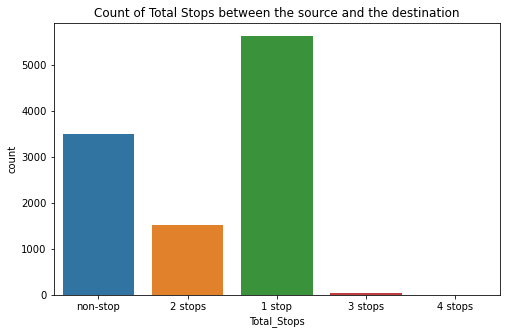

In [46]:
# Visualizing the Total Stops between the source and the destination
plt.figure(figsize=(8,5))
sns.countplot(train_df["Total_Stops"])
plt.title("Count of Total Stops between the source and the destination")
plt.show()

# Observations

- The count is high in 1 stop followed by non-stop. 
- Most of the flights have only 1 stop between the source and the destination. 
- Few flights have 2 stops between he source and the destination
- Least number of flights have 3 stops
- No flights have 4 stops between the source and destination.

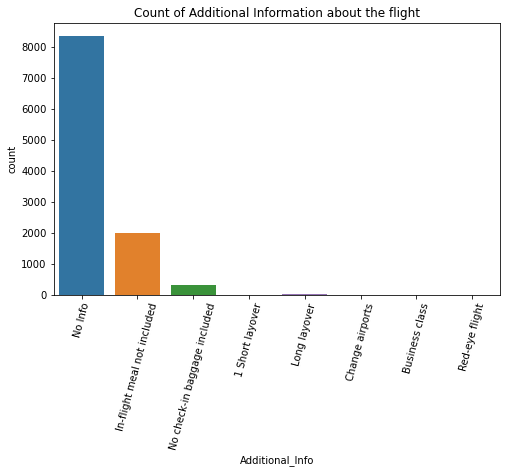

In [47]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(train_df["Additional_Info"])
plt.title("Count of Additional Information about the flight")
plt.xticks(rotation=75)
plt.show()

# Observations
- Most of the flights has no info in the additional info
- few flights had information about the in flight meals being not included
- Fewer number of flights had information about No check-in baggage included
- there were neligible to no flights having 1 short layover, Long layover, Change airports, Business class, Red-eye flight in the additional info column

# Checking the Distribution of skewness

## Plotting numerical columns

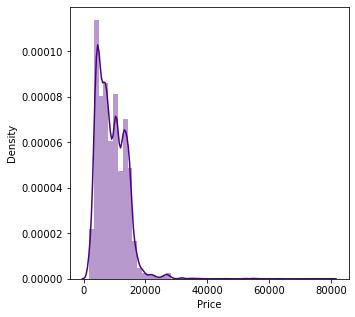

In [48]:
# Checking the Distribution of skewness in Price column
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(train_df['Price'],color="indigo")
plt.show()

# Observations
- From the above distribution plot we can observe the data is not normally distributed in the price column
- The Price column is skewed to right as the mean is more than the median in this column.

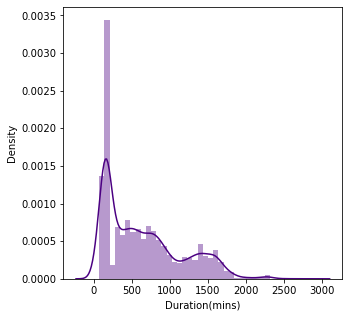

In [49]:
# Checking the Distribution of skewness in Duration(mins) column
plt.figure(figsize=(5,5),facecolor='white')
sns.distplot(train_df['Duration(mins)'],color="indigo")
plt.show()

# Observations
- From the above distribution plot we can observe the data is not normally distributed in the price column
- The Duration(mins) column is skewed to right as the mean is more than the median in this column.

#### Though other columns have numerical data we cannot call them as numerical information, they have limited numbers so we can analyse those columns using the count plots

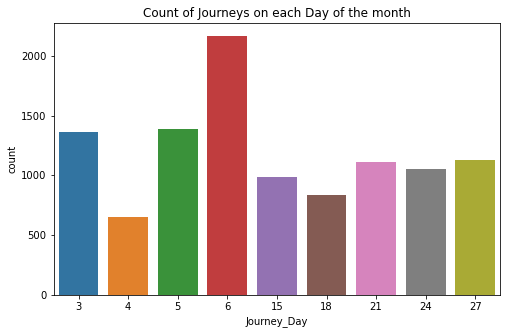

In [50]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(train_df["Journey_Day"])
plt.title("Count of Journeys on each Day of the month")
plt.show()

# Observations
- The count of journeys on 6th day of the month are very high
- Journeys on the 4th day of the month are least
- Other days have moderate level of journeys

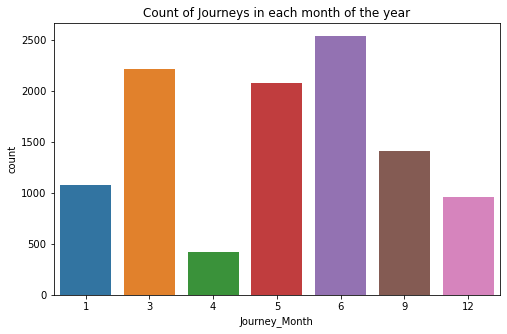

In [51]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(train_df["Journey_Month"])
plt.title("Count of Journeys in each month of the year")
plt.show()

# Observations
- The journeys in the 6th month are high in number
- There are least number of journeys in the 4th month

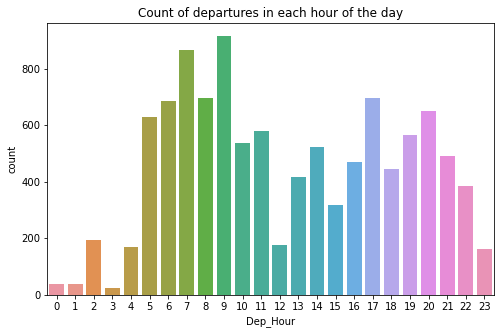

In [52]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(train_df["Dep_Hour"])
plt.title("Count of departures in each hour of the day")
plt.show()

# Observations
- There are high number of flights departed in the peak hour of the day at 9 AM
- There are least number of flights departed at midnight 12AM and 1AM

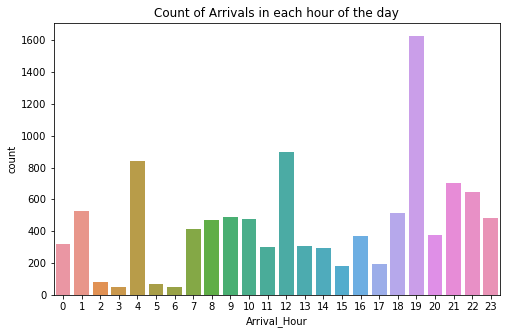

In [53]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(train_df["Arrival_Hour"])
plt.title("Count of Arrivals in each hour of the day")
plt.show()

# Observations
- There are highest number of flights departed at 19(7 PM)
- Least number of flights departed at 3AM and 6AM

# Bivariate Analysis

Text(0.5, 1.0, 'Price Trend')

<Figure size 1440x3024 with 0 Axes>

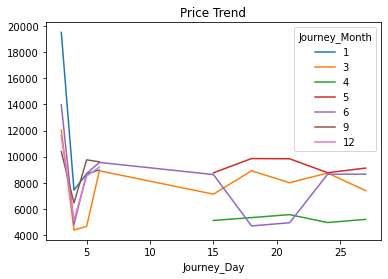

In [54]:
plt.figure(figsize=(20,42))
train_df.groupby(['Journey_Day','Journey_Month']).mean()['Price'].unstack().plot()
plt.title('Price Trend')

# Observations
- The price of the tickets are highest in the January start when compared to other months starting of each month and then dropped in the first week
- The price of the tickets are highest in the January start when compared to other months 
- The price of the tickets are lowest during in the month of march
- The price of the tickets are lowest during end of first week and the start of third week in the month.

<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

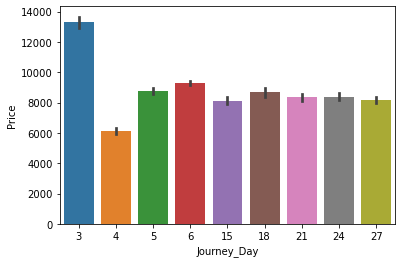

In [55]:
sns.barplot(train_df['Journey_Day'],train_df['Price'])

# Observations
From above graphs it can be observed that on an average, there is a steady decline in Flight price from start of the month to end of the month, with the prices being lowest in first week of the month.

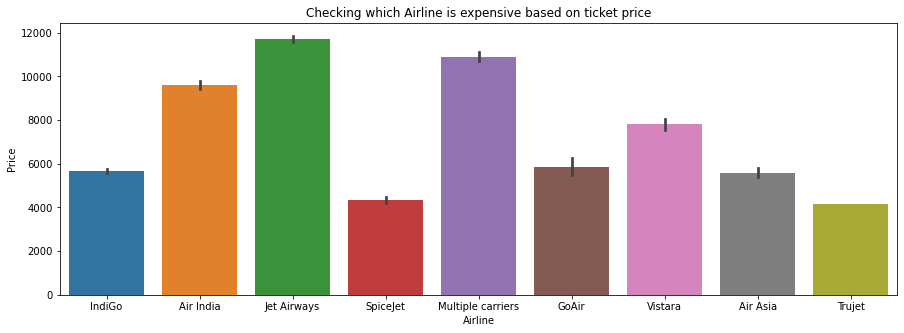

In [56]:
# Let's check which Airline is expensive based on Price of tickets

plt.figure(figsize=(15,5))
sns.barplot(train_df["Airline"],train_df["Price"],data=train_df)
plt.title("Checking which Airline is expensive based on ticket price")
plt.show()

# Observations
- The bar plot shows that the Jet Airways is most expensive Airline followed by Multiple carriers and Air India.
- The Trujet and Spicejet are have very cheap ticket prices compared to others.

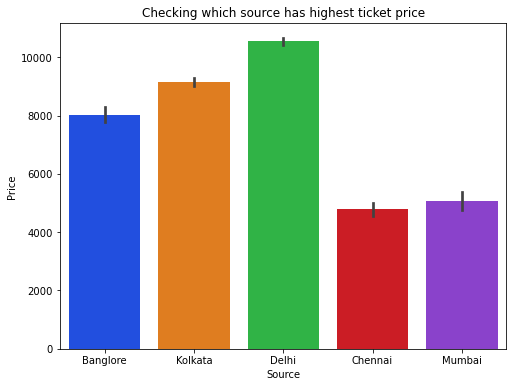

In [57]:
# Let's check the ticket prices in different sources

plt.figure(figsize=(8,6))
sns.barplot(train_df["Source"],train_df["Price"],data=train_df,palette="bright")
plt.title("Checking which source has highest ticket price")
plt.show()

# Observations
- The tickes prices are expensive in Delhi region compared to others and price is cheaper in Chennai and Mumbai sources.

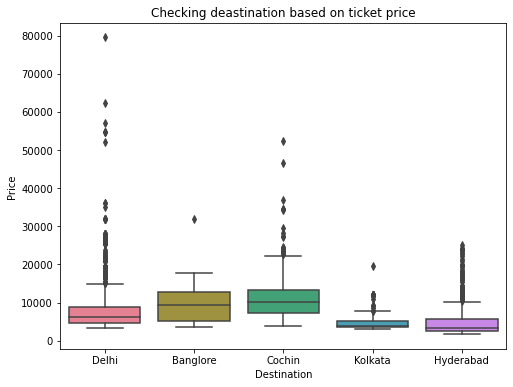

In [58]:
# Let's check how prices changes in each destination 

plt.figure(figsize=(8,6))
sns.boxplot(train_df["Destination"],train_df["Price"],data=train_df,palette="husl" )
plt.title("Checking deastination based on ticket price")
plt.show()

# Observations
- The ticket price is high in Cochin destination followed by Bangalore which means they have long distance from the source.

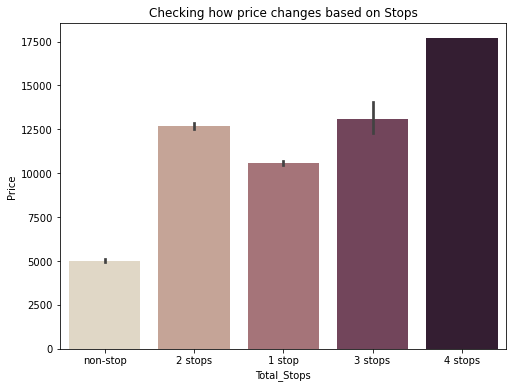

In [59]:
# Let's check the price vs total stops

plt.figure(figsize=(8,6))
sns.barplot(train_df["Total_Stops"],train_df["Price"],data=train_df,palette="ch:.28")
plt.title("Checking how price changes based on Stops")
plt.show()

# Observations
- Here the flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.

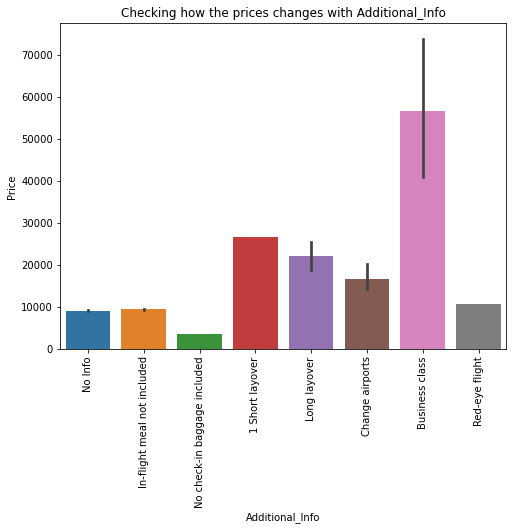

In [60]:
# Let's compare Additional_Info and Price of the flights

plt.figure(figsize=(8,6))
sns.barplot(train_df["Additional_Info"],train_df["Price"],data=train_df)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=90)
plt.show()

# Observations
The plot shows that the flights having Business class in the additional info are more expensive compared to others and the flights having No check-in baggage included in the additional info has least ticket price.

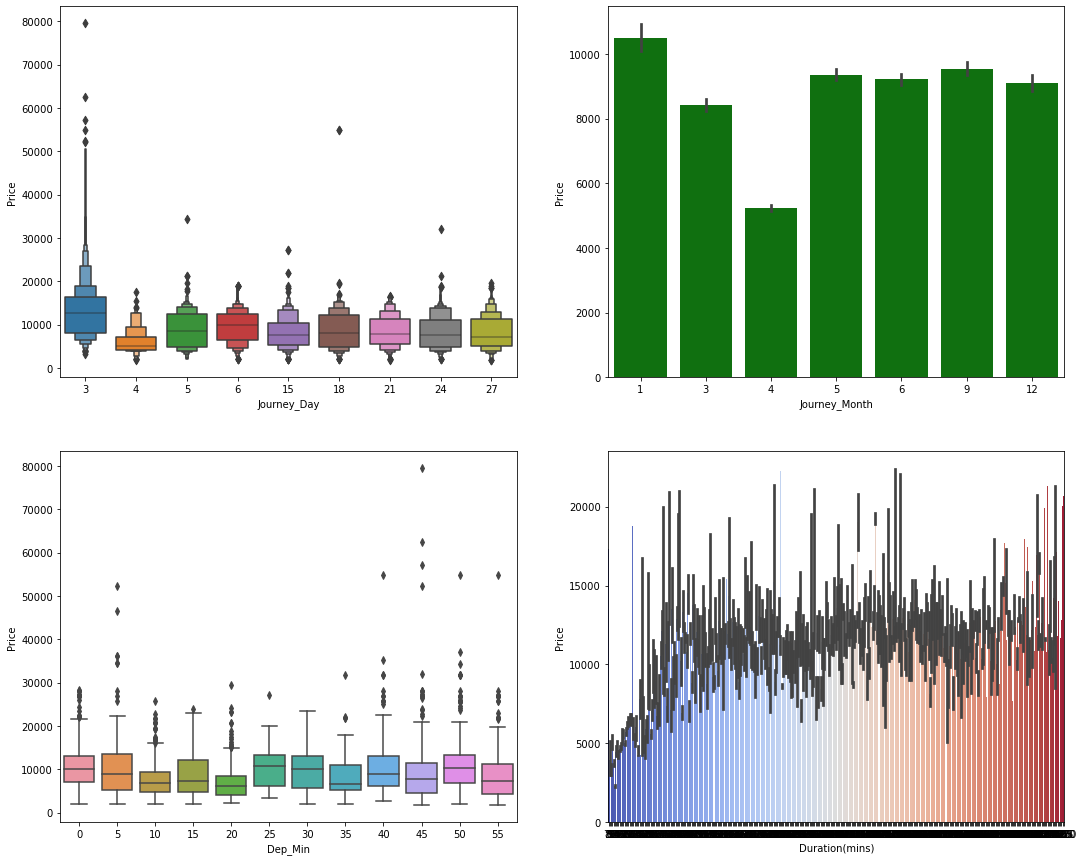

In [61]:
fig,axes=plt.subplots(2,2,figsize=(18,15))

# Checking relation between Journey_Day and Price
sns.boxenplot(x='Journey_Day',y='Price',ax=axes[0,0],data=train_df)

# Checking relation between Journey_Month and Price
sns.barplot(x='Journey_Month',y='Price',ax=axes[0,1],data=train_df,color="g")

# Checking relation between Dep_Min and Price
sns.boxplot(x='Dep_Min',y='Price',ax=axes[1,0],data=train_df)

# Checking relation between Duration_mins and Price
sns.barplot(x='Duration(mins)',y='Price',ax=axes[1,1],data=train_df,palette="coolwarm")
plt.show()

# Observations
From the above plots we can observe the following

- While comparing Journey_Day and Price we can see the price of ticket is high in days 1 - 3 of the month. Apart from this there is no much impact of day on ticket price.
- While comparing Journey_Month and Price it can be inferred that the flights travelling in the January month are more expensive than others and the flights travelling in April month have very cheap ticket prices.
- There in no significant relation between Dep_MIn and Price of the tickets.
- In the fourth graph also we can say that the flights with lower Duration(mins) are less expensive.

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

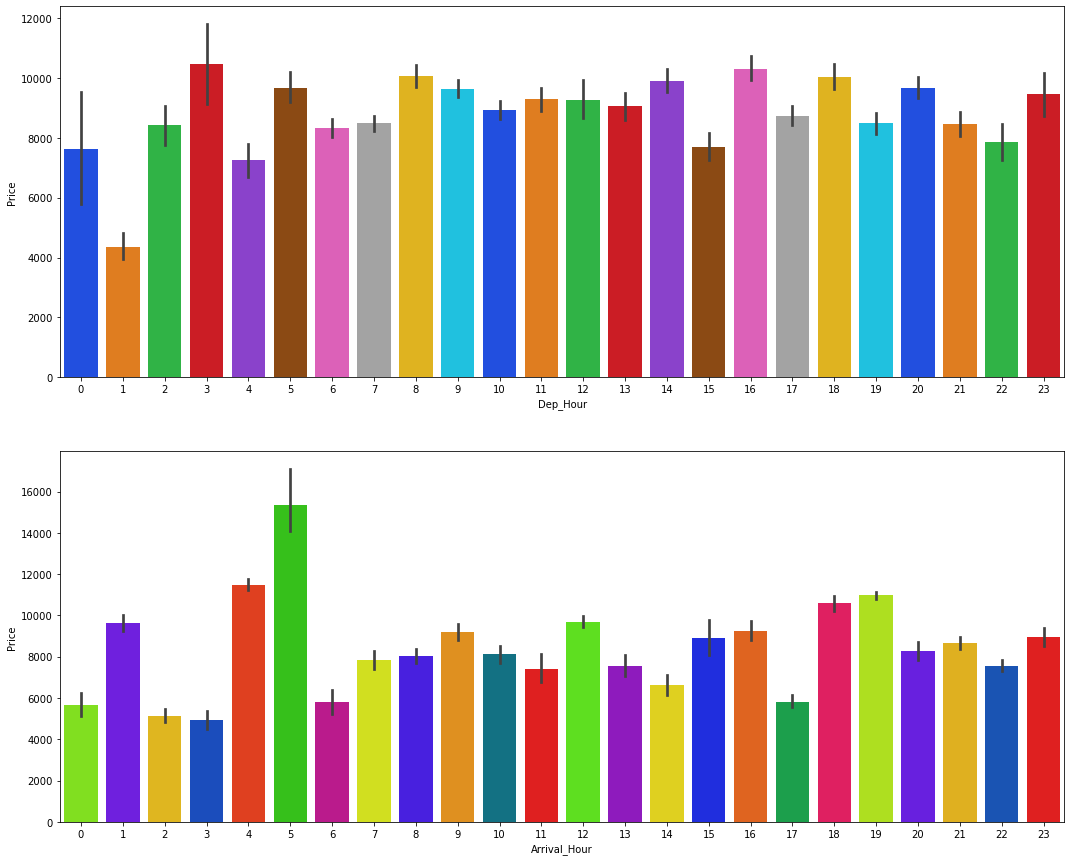

In [62]:
fig,axes=plt.subplots(2,figsize=(18,15))

# Checking relation between Dep_Hour and Price
sns.barplot(x='Dep_Hour',y='Price',ax=axes[0],data=train_df,palette="bright")

# Checking relation between Arrival_Hour and Price
sns.barplot(x='Arrival_Hour',y='Price',ax=axes[1],data=train_df, palette="prism")

# Observations
From the above graphs we can say that 
- The Prices of the flights departing at the 3rd hour of the day are expensive and are least expensive during the 1st hour
- The prices of the flights that arrive at 5 AM are expensive and the the prices of the flights that arrive between 2-3 AM are less expensive

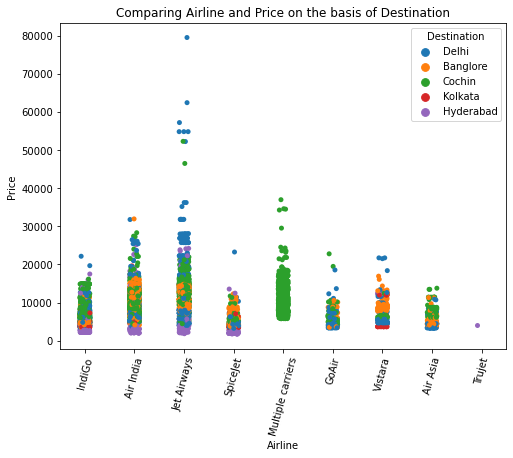

In [63]:
# Checking how the price pays role in Airline on the basis of destination
plt.figure(figsize=(8,6))
sns.stripplot(x=train_df['Airline'],y=train_df['Price'],hue=train_df["Destination"])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=75)
plt.show()

# Observations

- Here we can conclude that the Jet Airways flights that are destined to Delhi are more expensive compared to others.
- The trujet flights that are destined to hyderabad are less expensive compared to others.

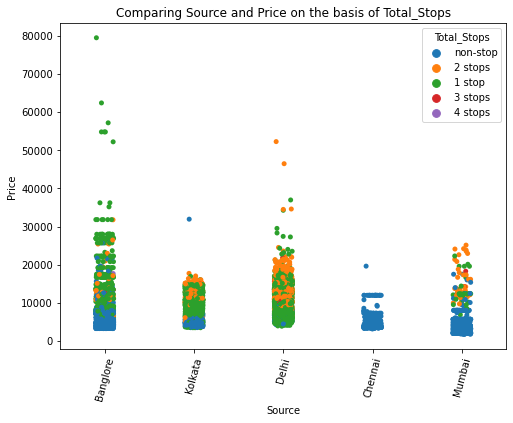

In [64]:
# Checking how the price pays role in Source on the basis of Total_Stops
plt.figure(figsize=(8,6))
sns.stripplot(x=train_df['Source'],y=train_df['Price'],hue=train_df["Total_Stops"])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=75)
plt.show()

# Observations
As we can notice that the flights that start at Bangalore and have only one stop between source and destination are expensive and the flights that start at Chennai with no stops have very cheap prices compared to other source flights.

# Multivariate Analysis

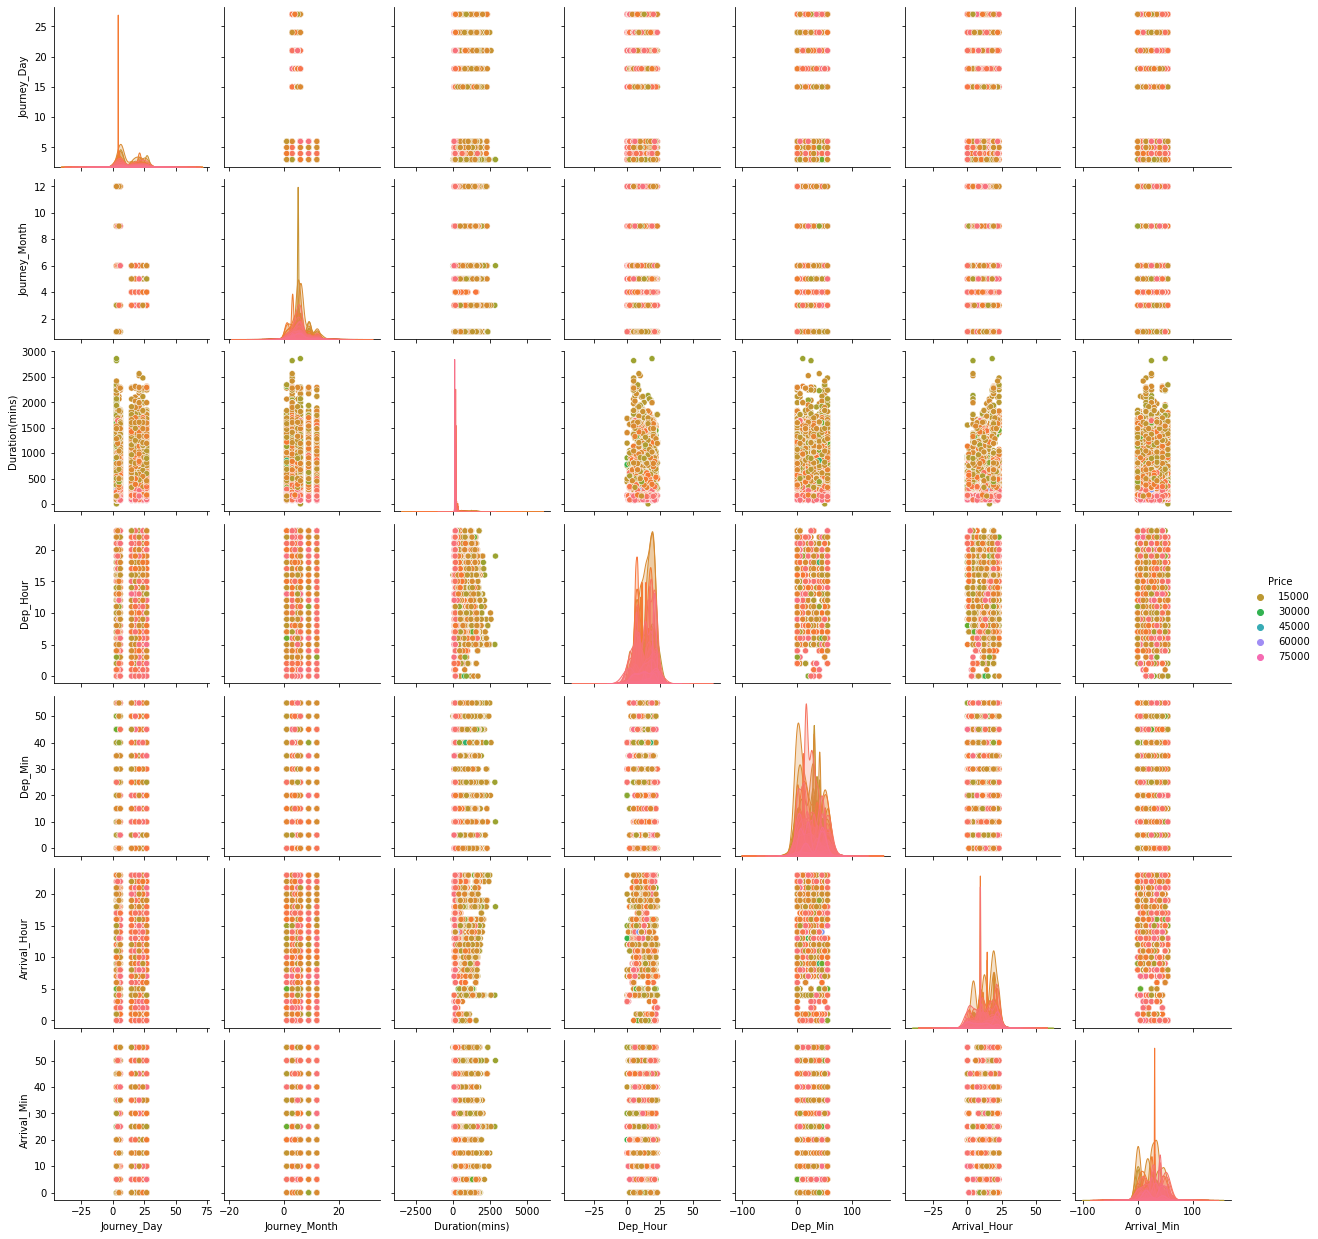

In [65]:
sns.pairplot(train_df,hue="Price",palette="husl")
plt.show()

# Observations
- This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.
- Here we can observe the correaltion between the features and on the diagonal we can notice the distribution plot which shows whether the column has skewness or not.
- We can notice the linear relation between the features.

# Identifying the outliers

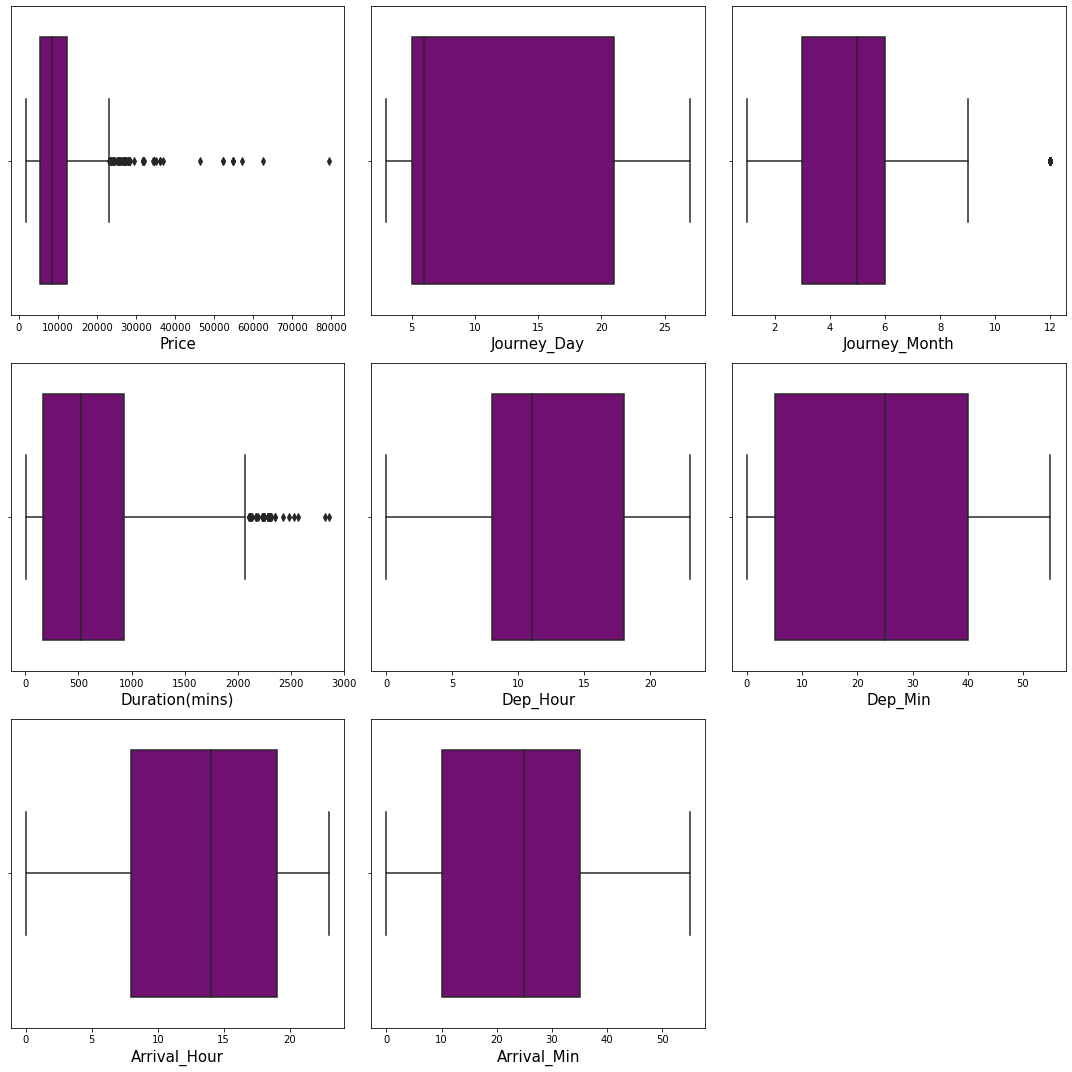

In [66]:
# Identifying the outliers using boxplot

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train_df[column],color="purple")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Observations
- There are outliers present in Price, Journey_Month and Duration(mins).
- Since Price is our target column so we need not remove outliers in this column.
- And Jpurney_Month is a numerical column so we can remove outliers in this column using Zscore method or IQR method.

# Removing outliers

# 1.Zscore method

In [67]:
# Assigning variable for columns that are having outliers
feature = train_df[['Duration(mins)','Journey_Month']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature))

z

array([[0.93158255, 0.84850298],
       [0.39007152, 1.5179928 ],
       [0.97847452, 1.15996647],
       ...,
       [0.91189124, 0.51375808],
       [0.95127386, 1.5179928 ],
       [0.28176932, 1.15996647]])

The outliers have been removed.

In [68]:
# Creating a new dataframe
new_train_df = train_df[(z<3).all(axis=1)] 
new_train_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,325,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,285,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,150,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,155,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,180,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,160,11,30,14,10


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [69]:
# Shape of new dataframe
new_train_df.shape

(10617, 14)

After removing outliers there are 10617 rows and 15 columns.

In [70]:
# Shape of original dataset
train_df.shape

(10683, 14)

Before removing outliers we had 10683 rows and 15 columns.

In [71]:
# Checking the the data loss
data_loss = (10683-10617)/10683*100
data_loss

0.6178039876439202

Here we are losing 0.6% which is very less.

Let's remove the outliers and check data loss using IQR method.

# 2. IQR (Inter Quantile Range) method

In [72]:
# 1st quantile
Q1=feature.quantile(0.25)

# 3rd quantile
Q3=feature.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [73]:
df1.shape

(9657, 14)

Using IQR method the dataframe has 10610 rows and 15 columns.

In [74]:
# Let's check the dataloss
data_loss = (10683-9657)/10683*100
data_loss

9.604043807919124

Using IQR method we are losing 9.6% data, which is less than 10% but Zscore method has minimal loss compared to IQR. So lets continue with Zscore method resultant dataframe.

# Checking skewness in the data

In [75]:
# Checking the skewness
new_train_df.skew()

Price             1.824502
Journey_Day       0.367029
Journey_Month     0.628224
Duration(mins)    0.774266
Dep_Hour          0.103798
Dep_Min           0.164551
Arrival_Hour     -0.361250
Arrival_Min       0.107805
dtype: float64

# Observations
- We can find the columns Price, Journey_Month and Duration(mins) have skewness. So lets remove skewness from Duration(mins) and Journey_Month as they are numerical columns.
- The column Price is our target so we need not remove skewness in this column.

# Removing skewness using log transformation

In [76]:
new_train_df["Duration(mins)"] = np.log1p(new_train_df["Duration(mins)"])
new_train_df["Journey_Month"] = np.log1p(new_train_df["Journey_Month"])

In [77]:
# Again checking skewness
new_train_df.skew()

Price             1.824502
Journey_Day       0.367029
Journey_Month    -0.533689
Duration(mins)   -0.178335
Dep_Hour          0.103798
Dep_Min           0.164551
Arrival_Hour     -0.361250
Arrival_Min       0.107805
dtype: float64

We can see that the skewness has been removed in both the columns

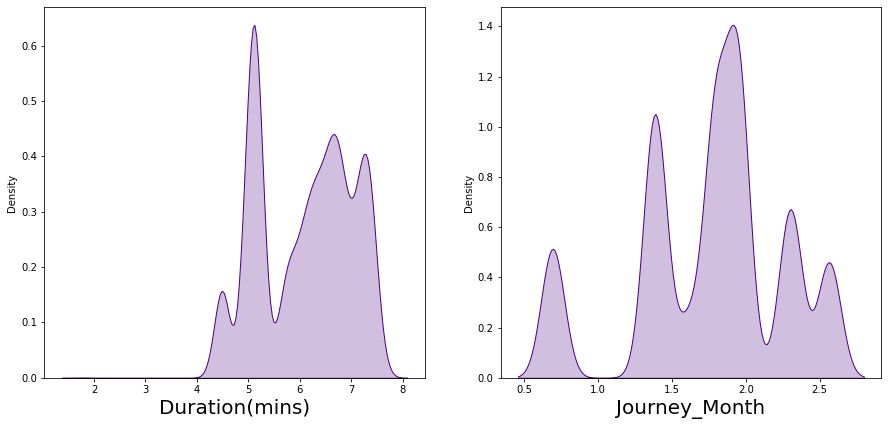

In [78]:
# Visualizing the distribution after removing the skewness
skew = ["Duration(mins)","Journey_Month"]
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in new_train_df[skew]:
    if plotnumber<=2:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_train_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Taking care of categorical columns using label encoding method

In [79]:
# checking for categorical columns
categorical_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [80]:
categorical_col = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [81]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_train_df[categorical_col]= new_train_df[categorical_col].apply(LE.fit_transform)
new_train_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,4,5,3897,24,1.386294,5.141664,22,20,1,10
1,1,3,0,84,1,5,7662,5,0.693147,6.100319,5,50,13,15
2,4,2,1,118,1,5,13882,6,2.302585,7.039660,9,25,4,25
3,3,3,0,91,0,5,6218,5,2.564949,5.786897,18,5,23,30
4,3,0,2,29,0,5,13302,3,0.693147,5.655992,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,4,2.302585,5.017280,19,55,22,25
10679,1,3,0,64,4,5,4145,27,1.609438,5.049856,20,45,23,20
10680,4,0,2,18,4,5,7229,27,1.609438,5.198497,8,20,11,20
10681,8,0,2,18,4,5,12648,3,0.693147,5.081404,11,30,14,10


All the categorical columns have been converted into numerical using label encoding

# Correlation

In [82]:
# Checking the correlation between features and the target
cor = new_train_df.corr()
cor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.077818,-0.028238,-0.070340,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.122739,0.059469,-0.055929,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.509154,-0.088810,0.097052,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,-0.439372,0.002232,0.163635,0.096042,0.076196,0.368475,-0.070005,-0.066420,0.011514,-0.174071
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,1.000000,0.234493,-0.572413,0.043711,-0.048791,-0.809980,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.251284,-0.052282,0.008984,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.605786,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.042848,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.061807,0.020587,-0.005264,-0.005743,-0.031453
Duration(mins),-0.077818,0.122739,-0.509154,0.368475,-0.809980,-0.251284,0.605786,-0.042848,0.061807,1.000000,-0.001689,-0.033797,0.056730,-0.125315


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

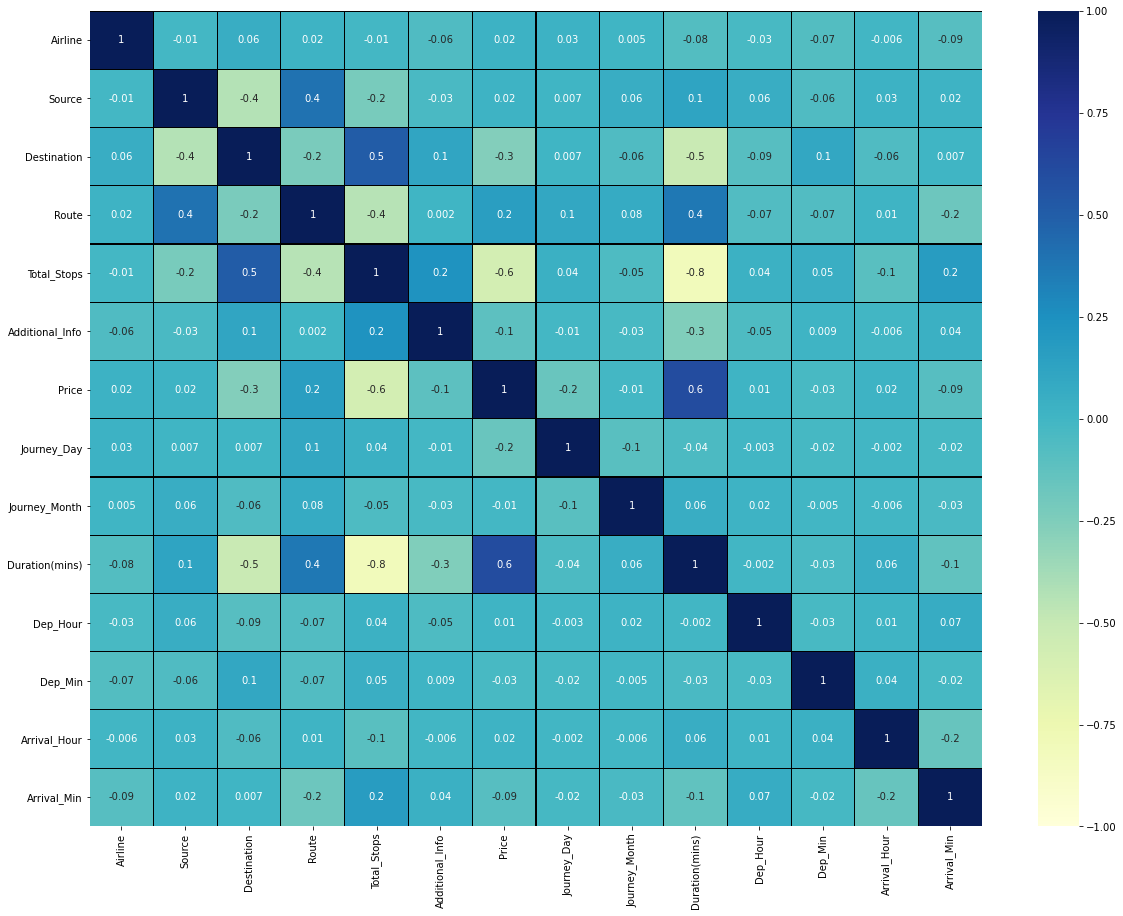

In [83]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))    
sns.heatmap(new_train_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

# Observations
This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

- This heat map contains both positive and negative correlation.
- The feature Duration(mins) is highly positively correlated with the target Price.
- The feature Total_Stops is highly Negatively correlated with the label.
- The feature Total_Stops is most positively correlated the Destination
- The features Duration(mins) and Total_Stops are highly negatively correlated with each other. This may lead to multicollinearity problem so we will check the VIF value to solve this, if we get the features having VIF more than 10 then we can drop those columns.

In [84]:
cor['Price'].sort_values(ascending=False)

Price              1.000000
Duration(mins)     0.605786
Route              0.163635
Airline            0.024773
Arrival_Hour       0.021107
Source             0.016718
Dep_Hour           0.011430
Journey_Month     -0.013511
Dep_Min           -0.025585
Arrival_Min       -0.088909
Additional_Info   -0.114590
Journey_Day       -0.163765
Destination       -0.263334
Total_Stops       -0.572413
Name: Price, dtype: float64

Here we can notice the positive and negative correlation of target and features.

# Visualizing the correlation between label and features using bar plot

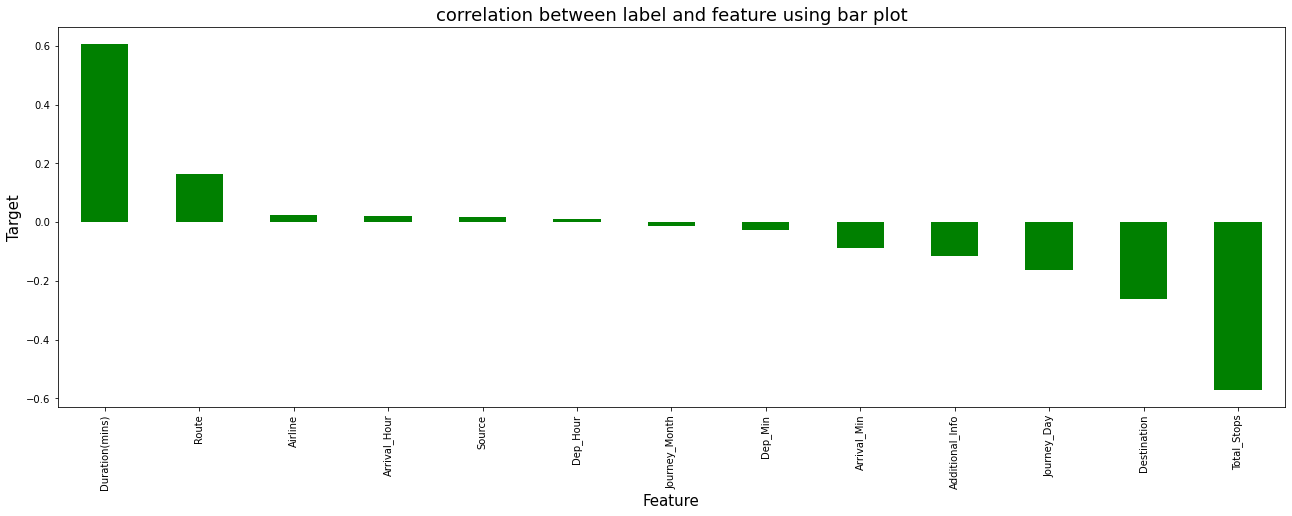

In [85]:
plt.figure(figsize=(22,7))
new_train_df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Observations

- The features Journey_Month, Source,Arrival_Hour, Dep_Hour, Dep_min and Airline are least correlated with the label so we can drop these columns if necessary.

# Separating the feature and label into x and y

In [86]:
x = new_train_df.drop("Price", axis=1)
y = new_train_df["Price"]

In [87]:
# Dimension of x
x.shape

(10617, 13)

In [88]:
# Dimension of y
y.shape

(10617,)

# Feature Scaling using Standard Scaling

In [89]:
#Transforming the data using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.286176,-0.754967,-1.058285,1.649475,-0.235894,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,-0.253797,0.424603,-0.873920,-2.141814,0.007344,-1.312186,1.362715,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,-0.253797,0.424603,-0.760231,1.078344,1.051504,-0.615325,0.030541,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.805850,0.424603,-0.873920,1.603281,-0.341051,0.952614,-1.035199,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.805850,0.424603,-1.101299,-2.141814,-0.486564,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,1.402360,0.424603,-0.987609,1.078344,-1.196549,1.126829,1.629150,1.265500,0.019019
10613,-1.464134,0.888124,-1.157048,-0.290502,1.402360,0.424603,1.627244,-0.308502,-1.160337,1.301044,1.096280,1.411228,-0.283723
10614,0.213836,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.627244,-0.308502,-0.995110,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.451129,-1.655042,0.812707,-1.544003,1.402360,0.424603,-1.101299,-2.141814,-1.125269,-0.266894,0.296976,0.099677,-0.889208


The data has been scaled using standard scaling method to overcome with the issue of bias in the data.

In the heat map we have found some features having high correlation between each other which means there is a chance for multicollinearity problem so let's check the VIF value to solve multicollinearity problem.

# Checking VIF

In [90]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF,Features
0,1.043901,Airline
1,1.529957,Source
2,1.773160,Destination
3,1.561303,Route
4,3.393121,Total_Stops
5,1.103963,Additional_Info
6,1.035535,Journey_Day
7,1.022210,Journey_Month
8,3.307864,Duration(mins)
9,1.031697,Dep_Hour


Here we can notice the VIF value is less than 4 in all the columns. It can be concluded there is no multicollinearity problem. Hence let's proceed to build the machine learning models.

# Modeling

# Finding the best random state

In [91]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [92]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9160915150515305  on Random_state  181


The above are the accuracy and the best random state

# Feature Importance

,Importance
Features,
Duration(mins),0.449
Journey_Day,0.121
Airline,0.102
Journey_Month,0.072
Additional_Info,0.055
Total_Stops,0.047
Route,0.044
Dep_Hour,0.029
Arrival_Hour,0.028


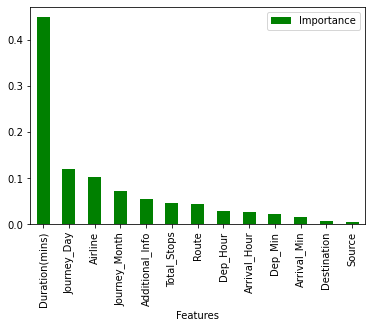

In [93]:
# Lets ckeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='g')
importances

With the help of Random Forest Regressor we are able to list down the importance given to a feature as per it's weightage in predicting our label.

# Creating new train test split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [95]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# 1.Random Forest Regressor

R2_Score: 0.9166863259952562
MAE: 644.9309957353103
MSE: 1689100.2295968463
RMSE: 1299.653888385999


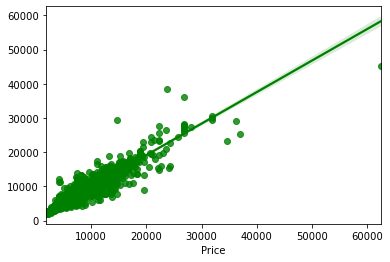

In [96]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

The predicted R2 score using Random Forest Regressor is 91.66%.

# 2.Decision Tree Regressor

R2_Score: 0.8349724306935823
MAE: 697.3678593848085
MSE: 3345766.568755667
RMSE: 1829.1436708896508


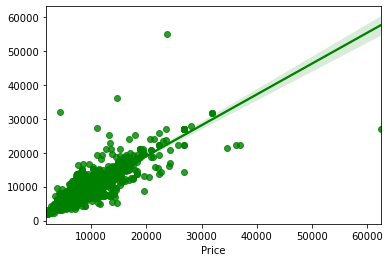

In [97]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicteed values
sns.regplot(y_test,predDTR,color="g")
plt.show()

The predicted R2 score using Decision Tree Regressor is 83.49%, which is less than the random forest regressor

# 3.Gradient Boosting Regressor

R2_Score: 0.8367295390021349
MAE: 1236.5766547105718
MSE: 3310142.9801568286
RMSE: 1819.379833942552


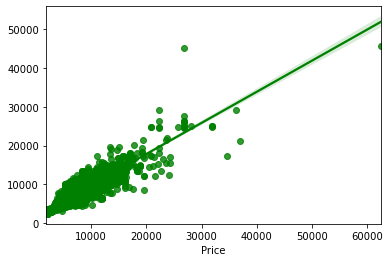

In [98]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

The predicted R2 score using Gradient Boosting Regressor is 83.67%.

# 4.Bagging Regressor

R2_Score: 0.9018047529285247
MAE: 673.4602150778705
MSE: 1990809.028111089
RMSE: 1410.9603212390805


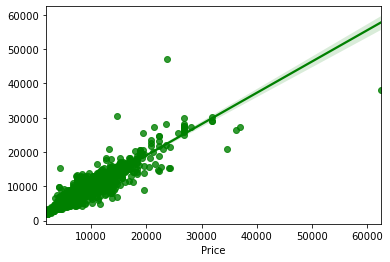

In [99]:
# Checking R2 score for BaggingRegressor

BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

The predicted R2 score using Bagging Regressor is 90.18%.

# 5.ExtraTrees Regressor

R2_Score: 0.9236508602463516
MAE: 619.3907412638628
MSE: 1547901.3622669724
RMSE: 1244.1468411192357


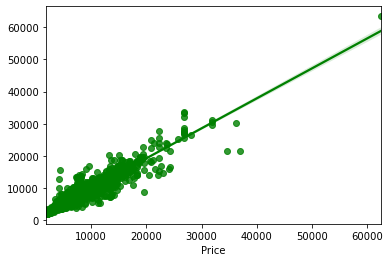

In [100]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
print('R2_Score:',r2_score(y_test,predXT))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

The predicted R2 score using Extra Trees Regressor is 92.36%.

# 6.XGB Regressor

R2_Score: 0.9116636459323516
MAE: 736.0138729500156
MSE: 1790929.9730188062
RMSE: 1338.2563181314729


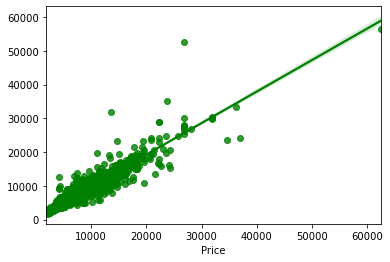

In [101]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
print('R2_Score:',r2_score(y_test,predXGB))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXGB))
print('MSE:',metrics.mean_squared_error(y_test, predXGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXGB)))

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

The predicted R2 score using XGB Regressor is 91.16%.

# Checking the cross validation score

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
# Checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.8763393570193312


In [104]:
# Checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.7990704720228485


In [105]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.8051332198601548


In [106]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.8684726797947688


In [107]:
# Checking cv score for ExtraTreesRegressor
print(cross_val_score(XT,x,y,cv=5).mean())

0.8979814566329904


In [108]:
# Checking cv score for XGBRegressor
print(cross_val_score(XGB,x,y,cv=5).mean())

0.8918322172558284


Above are the cross validation scores for all the models.

### Difference between R2 score and Cross Validation Score
- Random Forest Regressor = 4.03%
- Decision Tree Regressor = 3.59%
- Gradient Boosting Regressor = 3.16%
- Bagging Classifier = 3.34%
- Extra Trees Regressor = 2.57%
- XGB Regressor = 1.98%


From the differences between the R2 score and Cross Validation Score we can conclude that XGB Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper parameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
#XGB Regressor

parameters = {'n_estimators' : [50,100,200, 400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}

In [111]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [112]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [113]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 8, 'n_estimators': 50, 'n_jobs': -2}

In [114]:
Final_model = xgb(gamma=0.0, max_depth=8, n_estimators=50, n_jobs=-2)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 90.88524962679733
RMSE value: 1359.3833826112532
MAE: 704.4258260014517
MSE: 1847923.180919613


After tuning the final model has 90% accuracy

# Saving the model

In [115]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

The predicted for the train data has been saved 

# Predicting the saved model

In [116]:
# Loading the saved model
Model=joblib.load("Flight_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 2526.0222,  7698.3096, 13318.574 , ...,  7823.6797,  8842.543 ,
       14454.001 ], dtype=float32)

In [117]:
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3176,3177,3178,3179,3180,3181,3182,3183,3184,3185
Predicted,2526.022217,7698.30957,13318.574219,7623.256348,4247.838867,13326.833984,4546.469238,30572.185547,2067.680664,14156.435547,...,7660.27002,7738.706055,14006.145508,14926.884766,4058.603516,14416.770508,6065.489258,7823.679688,8842.542969,14454.000977
Original,2470.000000,8996.00000,13029.000000,6416.000000,4148.000000,13712.000000,5224.000000,36235.000000,2575.000000,13628.000000,...,7480.00000,7480.000000,13941.000000,15129.000000,3873.000000,14571.000000,6478.000000,8016.000000,8366.000000,13759.000000


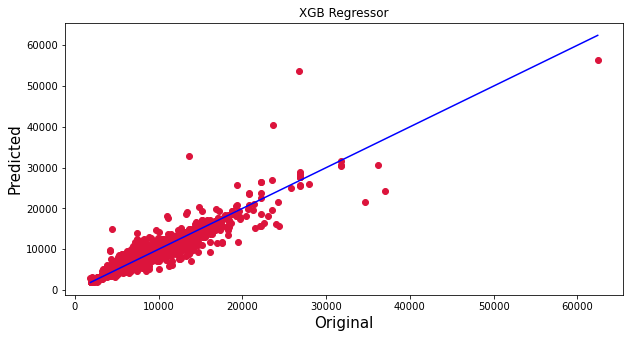

In [118]:
# Plotting Actual vs Predicted.
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Original', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGB Regressor")
plt.show()

The predicted values are similar to the actual values. Apart from few exceptions

Now we will use test dataset for getting prediction from the trained model.

# Test Data

## Importing Test dataset

In [119]:
# Reading the excel file from dataset
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset has no target variable, we need to use our past data(trained data) to get the ticket price prediction.

In [120]:
# Checking the dimension of the dataset
test_df.shape

(2671, 10)

There are 2671 rows and 10 columns are there in test dataset. All the columns are independent and there is no dependent variable in this dataset.

In [121]:
# Checking the columns in the dataset
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [122]:
# Checking the types of the dataset
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the columns have object datatype. We will convert them into numerical using encoding method. Before that we will perform some feature engineering.

# Feature Engineering

In [124]:
# Converting Date and Time columns from object type to Date Type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [125]:
# Again checking the type of dataset
test_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

Now we have converted object data type into datetime data type.

First will split Date_of_Journey into Month and day, since the dataset contains only 2019 year data so no need to take year column.

In [126]:
# Extracting Day from Date_of_Journey column
test_df["Journey_Day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
test_df["Journey_Month"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month

Now we have converted Date_of_Journey column into integers data type, we can drop this column as it is of no use.

In [127]:
# Dropping Date_of_Journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

The column Duration has values in terms of minutes and hours. Duration means the time taken by the pane to reach the destination and it is the difference between Departure time and the arrival time. Now let's extract hours and minutes from Duration.

### Converting the values in Duration column to minutes
The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [130]:
#creating a list with values from colum 'Duration'
duration = test_df['Duration'].tolist()

In [131]:
#Checking the output of the duration
duration

['10h 55m',
 '4h',
 '23h 45m',
 '13h',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m',
 '28h 55m',
 '9h 20m',
 '10h 15m',
 '4h 40m',
 '17h 20m',
 '10h 50m',
 '9h 15m',
 '12h 15m',
 '9h 10m',
 '9h 20m',
 '14h 50m',
 '14h 5m',
 '11h 35m',
 '13h 30m',
 '2h 50m',
 '12h 25m',
 '2h 30m',
 '25h 30m',
 '19h 25m',
 '7h',
 '2h 30m',
 '11h 40m',
 '7h 5m',
 '3h',
 '1h 25m',
 '2h 40m',
 '1h 25m',
 '6h 5m',
 '17h 5m',
 '10h 40m',
 '2h 30m',
 '12h 30m',
 '1h 30m',
 '23h 40m',
 '5h 15m',
 '2h 20m',
 '23h 35m',
 '1h 30m',
 '27h 40m',
 '13h 30m',
 '28h 20m',
 '5h 45m',
 '26h 25m',
 '5h 40m',
 '2h 15m',
 '2h 55m',
 '5h 45m',
 '7h 30m',
 '5h 20m',
 '25h 50m',
 '13h 15m',
 '26h 20m',
 '5h 45m',
 '5h 40m',
 '2h 40m',
 '2h 50m',
 '5h 25m',
 '8h 45m',
 '3h',
 '7h 20m',
 '1h 30m',
 '21h 10m',
 '16h',
 '7h 50m',
 '1h 30m',
 '3h',
 '2h 50m',
 '19h 25m',
 '2h 55m',
 '14h 5m',
 '2h 50m',
 '16h 5m',
 '5h 55m',
 '2h 30m',
 '10h 15m',
 '13h 50m',
 '2h 15m',
 '11h 55m',
 '2h 30m',
 '13h 20m',
 '18h 1

In [132]:
#replacing 'h' with *60, whitespace with "+",removing "m" and removing leading zeroes from the decimal integer literals since they aren't allowed in python

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 


In [133]:
#Checking the output of the duration
duration

['10*60+55',
 '4*60',
 '23*60+45',
 '13*60',
 '2*60+50',
 '18*60+20',
 '15*60+5',
 '5*60+15',
 '2*60+45',
 '6*60+5',
 '28*60+55',
 '9*60+20',
 '10*60+15',
 '4*60+40',
 '17*60+20',
 '10*60+50',
 '9*60+15',
 '12*60+15',
 '9*60+10',
 '9*60+20',
 '14*60+50',
 '14*60+5',
 '11*60+35',
 '13*60+30',
 '2*60+50',
 '12*60+25',
 '2*60+30',
 '25*60+30',
 '19*60+25',
 '7*60',
 '2*60+30',
 '11*60+40',
 '7*60+5',
 '3*60',
 '1*60+25',
 '2*60+40',
 '1*60+25',
 '6*60+5',
 '17*60+5',
 '10*60+40',
 '2*60+30',
 '12*60+30',
 '1*60+30',
 '23*60+40',
 '5*60+15',
 '2*60+20',
 '23*60+35',
 '1*60+30',
 '27*60+40',
 '13*60+30',
 '28*60+20',
 '5*60+45',
 '26*60+25',
 '5*60+40',
 '2*60+15',
 '2*60+55',
 '5*60+45',
 '7*60+30',
 '5*60+20',
 '25*60+50',
 '13*60+15',
 '26*60+20',
 '5*60+45',
 '5*60+40',
 '2*60+40',
 '2*60+50',
 '5*60+25',
 '8*60+45',
 '3*60',
 '7*60+20',
 '1*60+30',
 '21*60+10',
 '16*60',
 '7*60+50',
 '1*60+30',
 '3*60',
 '2*60+50',
 '19*60+25',
 '2*60+55',
 '14*60+5',
 '2*60+50',
 '16*60+5',
 '5*60+55'

In [134]:
# Performing the eval function on the data
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])

In [135]:
#Checking the length of the duration 
len(duration)

2671

In [136]:
#Assigning a variable for the dataframe
dur_df = pd.DataFrame({"Duration(mins)":duration})

This confirms the count of the number of rows in the column is as expected

In [137]:
# Matching the index of both dataframes
dur_df.index = test_df.index

In [138]:
#Concatenating two dataframes
test_df['Duration(mins)'] = dur_df['Duration(mins)']

In [139]:
# Dropping Duration column as it is redundant
test_df.drop("Duration",axis=1,inplace=True)

Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [140]:
# Extracting Hours from Dep_Time column
test_df["Dep_Hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
test_df["Dep_Min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute

Now we have extracted hour and minute from Dep_Time column so we can drop this column as it is of no use.

In [141]:
# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

Similarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column.

In [142]:
# Extracting hour from Arrival_Time
test_df["Arrival_Hour"] = pd.to_datetime(test_df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
test_df["Arrival_Min"] = pd.to_datetime(test_df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

Now we have extracted values from the respective columns, let's check the data frame after feature engineering.

In [143]:
# Checking dataset again
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,655,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,240,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,1425,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,780,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,170,23,55,2,45


In [144]:
test_df.shape

(2671, 13)

In [145]:
# Checking the value counts of each columns
for i in test_df.columns:
        print(test_df[i].value_counts())
        print('-'*50)

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64
--------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
--------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
--------------------------------------------------
DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                   

From the above value counts we can observe some repeated categories in some columns. Let's replace them.

In [146]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_df["Airline"] = test_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
test_df["Additional_Info"] = test_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

Now let's check the value counts in the above columns

In [147]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(test_df[i].value_counts())
    print('-'*50)

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
--------------------------------------------------
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
--------------------------------------------------
No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Long layover                       1
Business class                     1
Name: Additional_Info, dtype: int64
--------------------------------------------------


We have replaced the repeated categories that were present in the above columns.

In [148]:
# Checking number of unique values in each column
test_df.nunique()

Airline              8
Source               5
Destination          5
Route              100
Total_Stops          5
Additional_Info      6
Journey_Day          9
Journey_Month        7
Duration(mins)     320
Dep_Hour            24
Dep_Min             12
Arrival_Hour        24
Arrival_Min         12
dtype: int64

These are the number of unique values present in each columns.

In [149]:
# Checking null values in the dataframe
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Duration(mins)     0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

There are no missing values present in any of the columns.

# Description of Test Dataset

In [150]:
# Statistical summary of dataset
test_df.describe()

,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.00000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.026956,5.607263,639.74167,12.603519,24.891426,13.585174,24.558218
std,8.564408,3.042952,502.18693,5.686673,19.086522,7.040396,16.775436
min,3.000000,1.000000,5.00000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,175.00000,8.000000,5.000000,8.000000,10.000000
50%,6.000000,5.000000,520.00000,12.000000,25.000000,15.000000,25.000000
75%,21.000000,6.000000,915.00000,18.000000,45.000000,19.000000,35.000000
max,27.000000,12.000000,2440.00000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

- The counts of every column is same which means there are no missing values preent in the dataset.
- The mean value is greater than the median(50%) in the columns Journey_Day, Duration(mins) and Dep_Hour so we can say they are skewed to right.
- The median(50%) is bit greater than mean in Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left.
- In summarizing the data we can observe that there is bit differences between 75% and max which means some outliers present in the data.

In [151]:
# checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


These are the categorical columns in the given dataset.

In [152]:
# Now checking for numerical columns
numerical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Journey_Day', 'Journey_Month', 'Duration(mins)', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


These are the numerical columns present in the dataset.

# Identifying the outliers

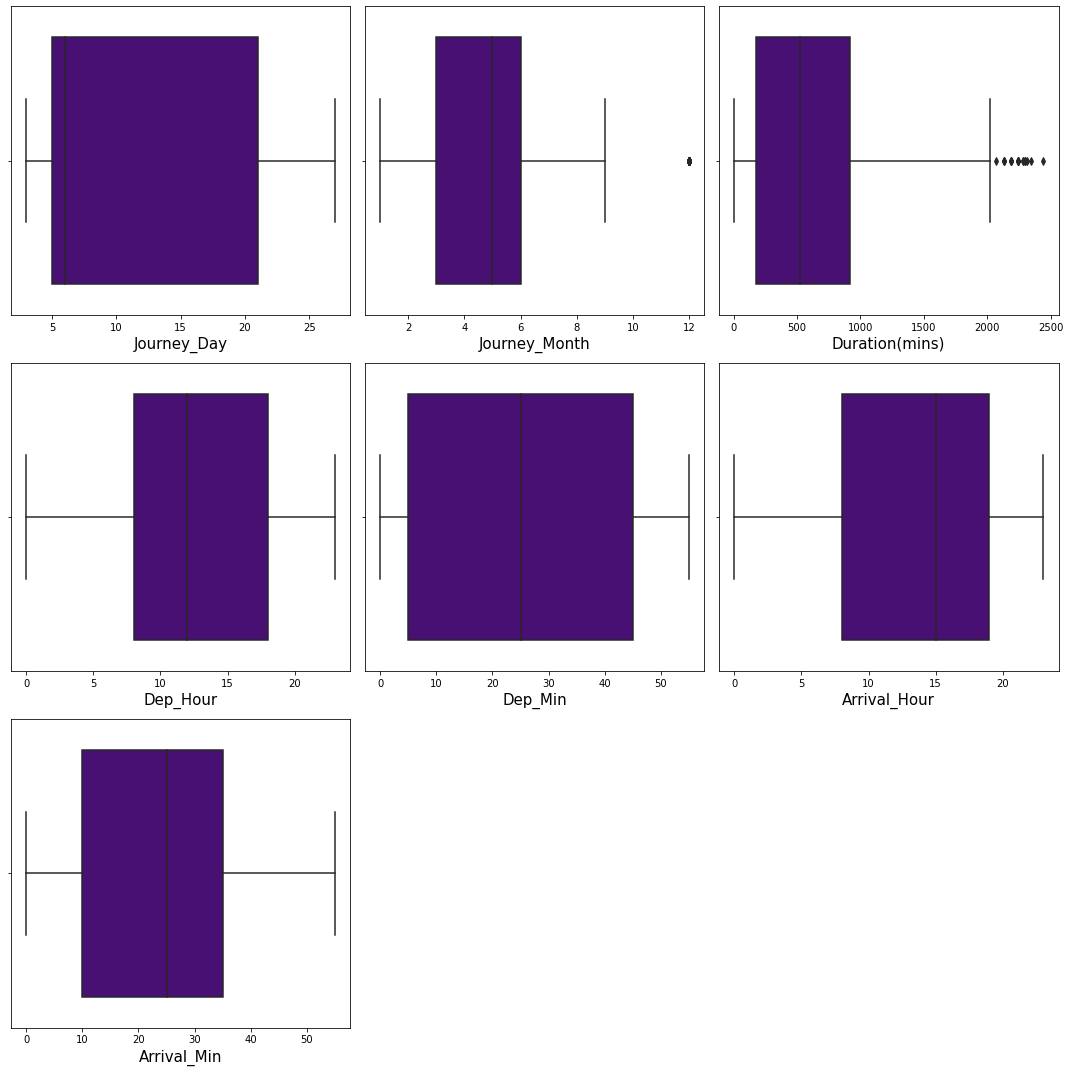

In [153]:
# Identifying the outliers using boxplot

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test_df[column],color="indigo")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can notice the outliers in Journey_Month and Duration(mins), let's remove outliers using Zscore method.

# Removing outliers

# 1.Zscore method

In [154]:
# Feature containing outliers
feature = test_df[['Duration(mins)','Journey_Month']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature))

z

array([[0.03038946, 0.12908857],
       [0.79615079, 2.10122721],
       [1.56397015, 0.1996012 ],
       ...,
       [0.48744299, 0.12908857],
       [0.5482219 , 0.12908857],
       [0.43868042, 0.12908857]])

Now we have removed the outliers.

In [155]:
# Creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)] 
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,655,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,5,12,240,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,1425,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,21,5,780,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,24,6,170,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No Info,6,6,1435,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No Info,27,3,155,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,395,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,915,4,0,19,15


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [156]:
# Shape of original dataset
test_df.shape

(2671, 13)

In [157]:
# Shape of new dataframe
new_test_df.shape

(2653, 13)

In [158]:
# Checking the the data loss
data_loss = (2671-2653)/2671*100
data_loss

0.6739049045301385

Here we are losing very less data hence we can proceed with the same metod need not test another method to remove outliers.

# Checking skewness in the data

In [159]:
# Checking the skewness
new_test_df.skew()

Journey_Day       0.475210
Journey_Month     0.591565
Duration(mins)    0.809826
Dep_Hour          0.083357
Dep_Min           0.132681
Arrival_Hour     -0.432551
Arrival_Min       0.110111
dtype: float64

The columns Journey_Month and Duration(mins) shows skewness, since they are continuous data we will try to remove skewness using log trasformaion method.

# Removing skewness using log transformation

In [160]:
new_test_df["Duration(mins)"] = np.log1p(new_test_df["Duration(mins)"])
new_test_df["Journey_Month"] = np.log1p(new_test_df["Journey_Month"])

In [161]:
# Again checking skewness
new_test_df.skew()

Journey_Day       0.475210
Journey_Month    -0.541053
Duration(mins)   -0.229080
Dep_Hour          0.083357
Dep_Min           0.132681
Arrival_Hour     -0.432551
Arrival_Min       0.110111
dtype: float64

The skewness has been removed.

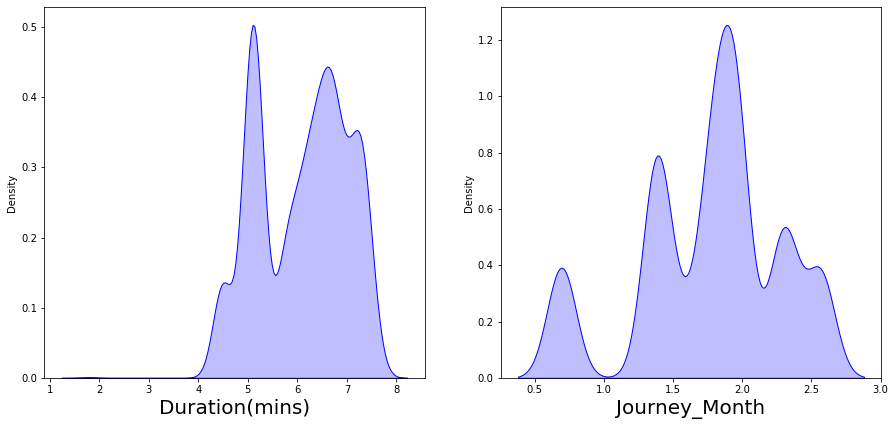

In [162]:
# Visualizing the distribution after removing the skewness
skew = ["Duration(mins)","Journey_Month"]
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in new_train_df[skew]:
    if plotnumber<=2:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_test_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# label encoding

In [163]:
# checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [164]:
categorical_col = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [165]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_test_df[categorical_col]= new_test_df[categorical_col].apply(LE.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,4,6,1.945910,6.486161,17,30,4,25
1,3,3,0,65,0,4,5,2.564949,5.484797,6,20,10,20
2,4,2,1,76,0,2,21,1.791759,7.262629,19,15,19,0
3,5,2,1,76,0,4,21,1.791759,6.660575,8,0,21,0
4,0,0,2,16,4,4,24,1.945910,5.141664,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,1.945910,7.269617,20,30,20,25
2667,3,3,0,43,4,4,27,1.386294,5.049856,14,20,16,55
2668,4,2,1,76,0,4,3,1.945910,5.981414,21,50,4,25
2669,1,2,1,76,0,4,3,1.945910,6.820016,4,0,19,15


Now we have converted the categorical columns into numerical columns using label encoding method.

# Feature Scaling using Standard Scaling

In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df), columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration(mins),Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-0.706193,0.344970,0.438880,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.791072,0.393727,-0.823069,1.565339,-0.681421,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,-0.791072,-2.166466,1.046954,0.041078,1.307572,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,-0.791072,0.393727,1.046954,0.041078,0.634010,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,1.429790,0.393727,1.397583,0.344970,-1.065309,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,-0.791072,0.393727,-0.706193,0.344970,1.315390,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,1.429790,0.393727,1.748212,-0.758252,-1.168021,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,-0.125818,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,0.812389,-1.524934,-1.302277,0.774190,-0.569955


We have scaled the data using standard scaling method to overcome with the issue of data biasness.

We have already loaded the saved model after saving the final model. Now let's predict the flight price using test data.

# Predicting the results

In [167]:
# Predicting the flight price from the features of the testing data 
Predicted_Price = Model.predict(new_test_df)
Predicted_Price

array([13825.766 ,  4790.7915, 12581.264 , ..., 17273.65  , 13052.471 ,
        7683.8306], dtype=float32)

Here we are using our predicted final model which is saved as Model to predict the price of the test dataset

# Creating DataFrame and Saving the predictions

In [168]:
Prediction = pd.DataFrame()
Prediction['Price']= Predicted_Price
Prediction

,Price
0,13825.765625
1,4790.791504
2,12581.263672
3,10807.494141
4,3451.617432
...,...
2648,9831.577148
2649,4830.537598
2650,17273.650391
2651,13052.470703


Here we are adding the predicted price output to our original test dataset to complete it with features and target column.

In [169]:
# Saving the predictions
Prediction.to_csv("Predicted_Flight_Price_Data.csv", index=False)

With the help of .to_csv we have exported the entire dataset in comma separated values (CSV) format that can be checked using the Excel spreadsheet program.

We have successfully completed predicting the flight prices of various Airlines.